In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from c19_load import load_multiple_countries

In [2]:
ASEAN_COUNTRIES = ['Singapore', 'Thailand', 'Malaysia', 'Indonesia', 'Vietnam', 'Cambodia', 'Philippines', 'Brunei']
df = load_multiple_countries(ASEAN_COUNTRIES)

LAST_DAYS = 30
Y_SIZE = 500

annotate_kwargs = dict(
    s='Based on COVID Data Repository by Johns Hopkins CSSE \nbryan.blackbee', 
    xy=(0.05, 0.00), xycoords='figure fraction', fontsize=10)

In [3]:
display(df)

,country,date,total,new,deaths,discharged,active
0,Singapore,2020-01-22,0,0,0,0,0
1,Singapore,2020-01-23,1,1,0,0,1
2,Singapore,2020-01-24,3,2,0,0,3
3,Singapore,2020-01-25,3,0,0,0,3
4,Singapore,2020-01-26,4,1,0,0,4
...,...,...,...,...,...,...,...
779,Brunei,2020-04-24,138,0,1,120,17
780,Brunei,2020-04-25,138,0,1,121,16
781,Brunei,2020-04-26,138,0,1,123,14
782,Brunei,2020-04-27,138,0,1,124,13


In [4]:
# 2nd graph, used for highlighting WHO declaring pandaemic
x = np.arange(df.shape[0])
df2 = pd.DataFrame({'x' : x, 'y' : 0})

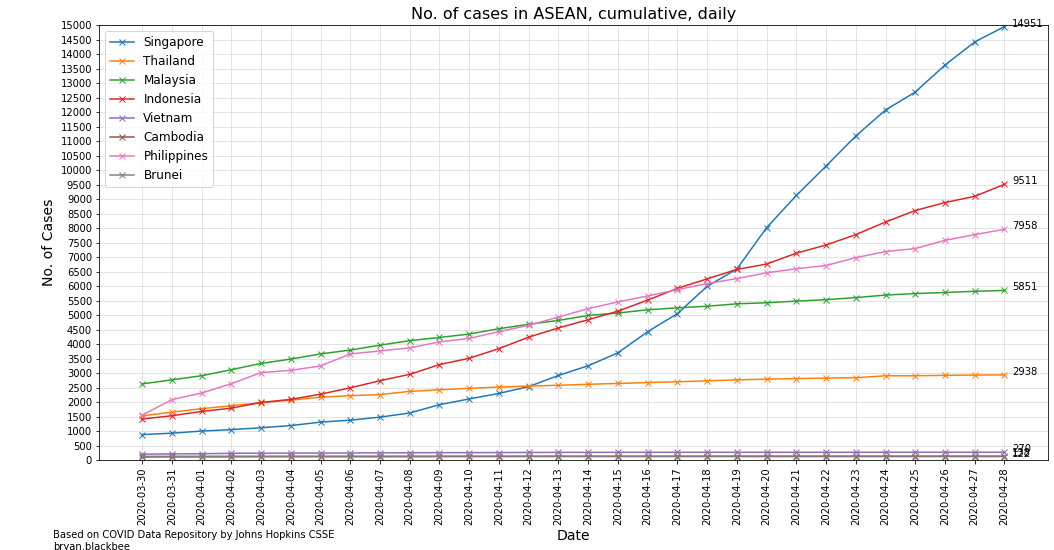

In [5]:
fig = plt.figure(figsize=(17,8))
ax = fig.add_subplot(1,1,1)

# Used for determination of values of axes
countries = []
todayscases = []

# Plot
for c in ASEAN_COUNTRIES:
    # Plot
    df_d = df[df.country==c].copy()
    df_d.tail(LAST_DAYS).plot(kind='line', x='date', y='total', ax=ax, marker='x', linewidth=1.5)
    # Collect data
    countries.append(c)
    todayscases.append(df_d['total'].tail(1).tolist()[0])

# x-axis
ax.set_xticks(range(LAST_DAYS))
ax.set_xticklabels(df['date'].tail(LAST_DAYS), rotation=90)
ax.set_xlabel("Date", fontsize=14)

# y-axis
todayscases_max = max(todayscases)
ylim_max = (todayscases_max//Y_SIZE + 1)*Y_SIZE
ax.set_ylim(0, ylim_max)
ax.set_yticks(range(0,ylim_max+1,Y_SIZE))
ax.set_ylabel("No. of Cases", fontsize=14)

# features of graph
ax.grid(color='GAINSBORO')
ax.legend(countries, fontsize=12)

# no. of cases annotation
for i, v in enumerate(todayscases):
    ax.text(df_d.tail(LAST_DAYS).shape[0]-0.75, v, str(v), fontsize=10)

# title
ax.set_title("No. of cases in ASEAN, cumulative, daily", fontsize=16)

# WHO Declares Pandemic
df_t = df.tail(LAST_DAYS).copy()
_ = df_t.reset_index(inplace=True, drop=True)

ax.annotate(**annotate_kwargs)

plt.show()

In [6]:
pivot_raw = df[(df.country.isin(ASEAN_COUNTRIES)) & (df.date.isin(df['date'].unique()[-int(LAST_DAYS/3):]))][['country', 'date', 'total']]
pivot_raw = pivot_raw.copy()
pd.pivot_table(pivot_raw, columns=['date'], index='country')

total                                                         \
date        2020-04-19 2020-04-20 2020-04-21 2020-04-22 2020-04-23 2020-04-24   
country                                                                         
Brunei             138        138        138        138        138        138   
Cambodia           122        122        122        122        122        122   
Indonesia         6575       6760       7135       7418       7775       8211   
Malaysia          5389       5425       5482       5532       5603       5691   
Philippines       6259       6459       6599       6710       6981       7192   
Singapore         6588       8014       9125      10141      11178      12075   
Thailand          2765       2792       2811       2826       2839       2907   
Vietnam            268        268        268        268        268        270   

                                                         
date        2020-04-25 2020-04-26 2020-04-27 2020-04-28  
country                                                  
Brunei             138        138        138        138  
Cambodia           122        122        122        122  
Indonesia         8607       8882       9096       9511  
Malaysia          5742       5780       5820       5851  
Philippines       7294       7579       7777       7958  
Singapore        12693      13624      14423      14951  
Thailand          2907       2922       2931       2938  
Vietnam            270        270        270        270

Sources: 

[COVID-19 outbreak 'a pandemic': WHO chief](https://www.channelnewsasia.com/news/world/covid-19-coronavirus-pandemic-who-chief-12528328)